# Сборный проект «Аналитика» #
# Описание проекта #
Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения. 

Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.

Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

# Описание данных #  
Каждая запись в логе — это действие пользователя, или событие.   
•	EventName — название события;  
•	DeviceIDHash — уникальный идентификатор пользователя;  
•	EventTimestamp — время события;  
•	ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.


# Оглавление <a id='Оглавление'></a>

[Загрузка библиотек](#0_1)

**1. Открываем файл с данными и изучаем общую информацию**  

[Путь к файлу: /datasets/logs_exp.csv. ](#1_1)

**2. Подготавливаем данные**  
    [Заменим названия столбцов на удобные](#2_1)  
    [Проверим пропуски и типы данных. Откорректируем, если нужно](#2_2)  
    [Добавим столбец даты и времени, а также отдельный столбец дат](#2_3)  

**3. Изучаем и проверяем данные**  

[Сколько всего событий в логе?](#3_1)  
[Сколько всего пользователей в логе?](#3_2)  
[Сколько в среднем событий приходится на пользователя?](#3_3)  
[Данными за какой период располагаем? Найдем максимальную и минимальную дату. Изучим, как меняется количество данных: построим столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп. Можно ли быть уверенным, что у нас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определим, с какого момента данные полные и отбросим более старые. Данными за какой период времени мы располагаем на самом деле?](#3_4)  
[Много ли событий и пользователей потеряли, отбросив старые данные?](#3_5)  
[Проверим, что у нас есть пользователи из всех трёх экспериментальных групп.](#3_6)  

**4. Изучаем воронку событий**  

[Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.](#4_1)  
[Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.](#4_2)  
[Предположим, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.](#4_3)  
[По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитаем отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.  
На каком шаге теряем больше всего пользователей?
Какая доля пользователей доходит от первого события до оплаты?](#4_4)  
    
**5. Изучаем результаты эксперимента**  

[Сколько пользователей в каждой экспериментальной группе?](#5_1)  
[Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247.](#5_2)  
[Выберем самое популярное событие. Посчитаем число пользователей, совершивших это событие в каждой из контрольных групп. Посчитаем долю пользователей, совершивших это событие. Проверим, будет ли отличие между группами статистически достоверным. Проделаем то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?](#5_3)  
[Аналогично поступим с группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравним результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?](#5_4)  
[Какой уровень значимости выбрали при проверке статистических гипотез выше? Посчитаем, сколько проверок статистических гипотез мы сделали. При уровне значимости 0.1 в 10% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна. Какой уровень значимости стоит применить? Если мы хотим изменить его, проделаем предыдущие пункты и проверим свои выводы.](#5_5)

[Общие выводы](#6)  



# Подготовка
<a id='0_1'></a>
**Загрузка библиотек**  
[*Назад к оглавлению*](#Оглавление)

In [169]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from scipy import stats as st
import warnings
import plotly.subplots as sp

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.options.mode.chained_assignment = None
sns.set_style("white")

<a id='1_1'></a>
## Загрузка данных ###


In [170]:
pd.set_option("max_colwidth", 140) #ширина колонок

d_logs = pd.read_csv('/datasets/logs_exp.csv',sep='\t')
d_logs

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [171]:
display(d_logs.info())
print('Дубликатов:', d_logs.duplicated().sum())
print('Кол-во значений:', len(d_logs))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


None

Дубликатов: 413
Кол-во значений: 244126


*Уникальные значения*

In [172]:
display(d_logs['EventName'].unique())

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

**Выводы:**  
1. Загрузили датасет.  
2. Обнаружили дубликаты.  
3. Определили уникальные события.

## Подготовка данных
<a id='2_1'></a>
### Переименуем столбцы: ###
[*Назад к оглавлению*](#Оглавление)

In [173]:
d_logs = d_logs.rename(columns={"EventName": "event", "DeviceIDHash": "user_id", 
                            "EventTimestamp": "timestamp", "ExpId": "test_group"})
d_logs.sample(3)

,event,user_id,timestamp,test_group
30070,MainScreenAppear,7787161900943974716,1564678239,248
70101,MainScreenAppear,4587251806549230989,1564771573,246
152947,PaymentScreenSuccessful,1100007125648169445,1565001434,248


<a id='2_2'></a>
### Проверим пропуски и типы данных. Откорректируем, если нужно
[*Назад к оглавлению*](#Оглавление)

Поле timestamp - int64. Далее исправим.

In [174]:
print('Логов до удаления дубликатов:', len(d_logs))
print('Дубликатов:', d_logs.duplicated().sum())
d_logs.drop_duplicates(inplace=True)
print('Логов после удаления дубликатов:', len(d_logs))

Логов до удаления дубликатов: 244126
Дубликатов: 413
Логов после удаления дубликатов: 243713


<a id='2_3'></a>
### Добавим столбец даты и времени, а также отдельный столбец дат
[*Назад к оглавлению*](#Оглавление)

In [175]:
# Создадим поле `datetime` с датой и временем:
d_logs['date_time'] = pd.to_datetime(d_logs['timestamp'], unit='s')

# Добавим поле с датой:
d_logs['date_1'] = pd.to_datetime(d_logs['date_time'].dt.date)
#display(d_logs.sample(5))
print(d_logs.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event       243713 non-null  object        
 1   user_id     243713 non-null  int64         
 2   timestamp   243713 non-null  int64         
 3   test_group  243713 non-null  int64         
 4   date_time   243713 non-null  datetime64[ns]
 5   date_1      243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 13.0+ MB
None


<div class="alert alert-block alert-info">

### Комментарий студента v_1:
Устраняем замечание ниже "стоит проверить, не попали ли у нас одни и те же пользователи в разные группы".
</div>

In [176]:
d_logs.nunique() # уникальные значения по столбцам

event              5
user_id         7551
timestamp     176654
test_group         3
date_time     176654
date_1            14
dtype: int64

In [177]:
#пользователи, попавшие в разные группы
#https://ru.stackoverflow.com/questions/1298350/%D0%9A%D0%B0%D0%BA-%D0%BF%D0%BE%D1%81%D1%87%D0%B8%D1%82%D0%B0%D1%82%D1%8C-%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9-%D0%BF%D0%BE%D0%BF%D0%B0%D0%B2%D1%88%D0%B8%D1%85-%D0%B2-%D0%B4%D0%B2%D0%B5-%D0%B3%D1%80%D1%83%D0%BF%D0%BF%D1%8B-%D0%B8%D0%B7-%D0%B4%D0%B2%D1%83%D1%85
dat1=d_logs.groupby('user_id').agg({'test_group' : 'nunique'}).query('test_group>1').count()
dat1

test_group    0
dtype: int64

In [178]:
#Далее создаем список пользователей с уникальными visitor_id:
double_users = d_logs.groupby('user_id').agg({'test_group' : 'nunique'}).reset_index().query('test_group>1')['user_id'].unique()
double_users 

array([], dtype=int64)

НЕ попали одни и те же пользователи в разные группы.

**Выводы:**
1. Скорректировали названия полей.  
2. Удалили дубли.  
3. Добавили поле date_time с датой и временем.  
4. Создали поле date_1 с датой.
5. Проверили, что НЕ попали одни и те же пользователи в разные группы.

## Изучаем и проверяем данные

<a id='3_1'></a>
### Сколько всего событий в логе?
[*Назад к оглавлению*](#Оглавление)

In [179]:
print('Всего событий:', len(d_logs))

Всего событий: 243713


<a id='3_2'></a>
### Сколько всего пользователей?
[*Назад к оглавлению*](#Оглавление)

In [180]:
print('Всего пользователей:', d_logs['user_id'].nunique())

Всего пользователей: 7551


<a id='3_3'></a>
### Сколько в среднем событий приходится на пользователя?
[*Назад к оглавлению*](#Оглавление)

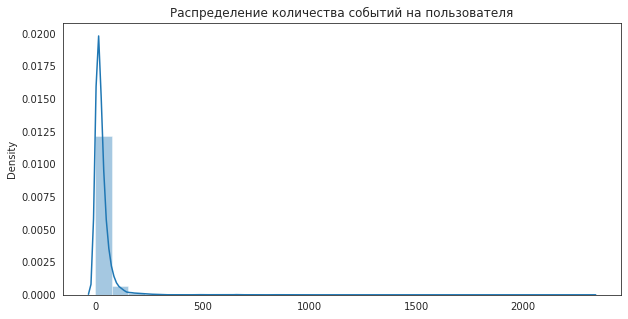

In [181]:
# Посмотрим, сколько событий в среднем приходится на пользователя:
events_by_user = d_logs.groupby('user_id').agg(event_count = ('event', 'count'))
plt.figure(figsize=(10, 5))
plt.title('Распределение количества событий на пользователя')
sns.distplot(events_by_user['event_count'], bins=30) 
plt.xlabel('')
plt.show()

Распределение не нормально, поэтому для оценки среднего возьмём медиану.

In [182]:
print('Среднее количество событий на пользователя:', 
      int(events_by_user['event_count'].median()))

Среднее количество событий на пользователя: 20


<a id='3_4'></a>
### Период
[*Назад к оглавлению*](#Оглавление)

In [183]:
d_logs['date_time'].describe()

count                  243713
unique                 176654
top       2019-08-01 14:40:35
freq                        9
first     2019-07-25 04:43:36
last      2019-08-07 21:15:17
Name: date_time, dtype: object

Мы располагаем данными за период с 25.07.2019 по 07.08.2019.

<div class="alert alert-block alert-info">

### Комментарий студента v_1:
Устраняем замечание ниже "количество бинов стоит определять так, чтобы каждый бин точно соответствовал определенному временному промежутку".  
    bins было 50, сделал равным количеству дней между 07/08/19 и 25/07/19 = 14 * 24 (часов в сутках).
</div>

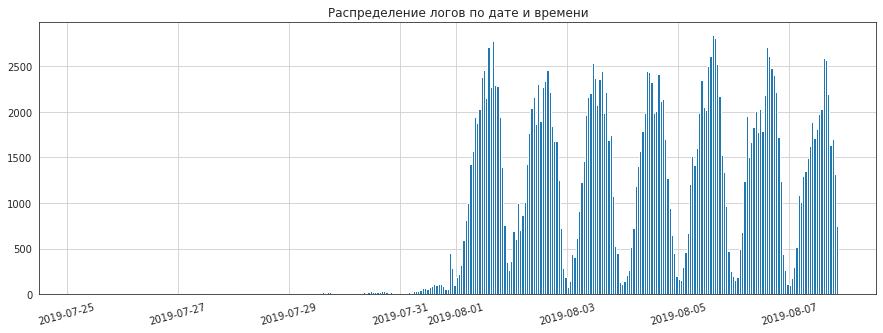

In [184]:
# Построим гистограмму по дате и времени:

plt.title('Распределение логов по дате и времени')
d_logs['date_time'].hist(bins=14*24, xrot=15,  figsize=(15, 5))
plt.show()
#display(logs.groupby('date')['event'].count())

Из графика видно, что *данные за июль 2019 не полные*.  

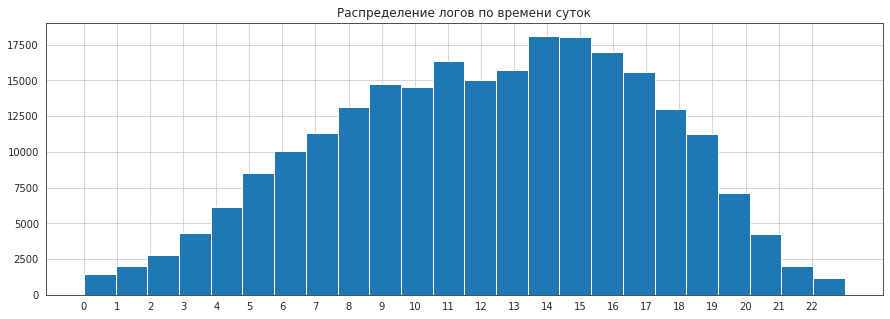

In [185]:
plt.title('Распределение логов по времени суток')
d_logs['date_time'].dt.hour.hist(bins=24, figsize=(15, 5))
plt.xticks(range(0, 23))
plt.show()

Заметна периодичность во времени: в ночные часы событий меньше, чем днём

Для корректности анализа будем использовать данные за период с 01.08.2019 по 07.08.2019 (только август 2019)

<a id='3_5'></a>
### Много ли событий и пользователей потеряли, отбросив старые данные?
[*Назад к оглавлению*](#Оглавление)

In [186]:
nlogs_before = len(d_logs)
nusers_before = d_logs['user_id'].nunique()
print('Всего событий:', nlogs_before)
print('Всего пользователей:', nusers_before)

logs = d_logs[d_logs['date_time'] >= '2019-08-01'].copy()
print()

# Посмотрим, сколько всего событий и пользователей осталось в логах:
print('Событий после корректировки периода:', len(logs))
print('Пользователей после корректировки периода:', logs['user_id'].nunique())
print()

# Изменения:
print('Изменение количества логов:', 
      len(logs)-nlogs_before, '({:.1%})'.format((len(logs)-nlogs_before)/nlogs_before))
print('Изменение количества пользователей:', 
      logs['user_id'].nunique()-nusers_before, '({:.1%})'.format((logs['user_id'].nunique()-nusers_before)/nusers_before))

Всего событий: 243713
Всего пользователей: 7551

Событий после корректировки периода: 240887
Пользователей после корректировки периода: 7534

Изменение количества логов: -2826 (-1.2%)
Изменение количества пользователей: -17 (-0.2%)


<a id='3_6'></a>
### Проверим, что у нас есть пользователи из всех трёх экспериментальных групп.
[*Назад к оглавлению*](#Оглавление)

In [187]:
logs.groupby('test_group').agg(count=('user_id', 'count'))

,count
test_group,
246,79302
247,77022
248,84563


Размеры групп различаются, что говорит о неоптимальности разбиения данных по группам. 

<div class="alert alert-block alert-info">

### Комментарий студента v_1:
Устраняем замечание ниже "А зачем два раза считать".  
Я вычисления копировал в выводы, чтобы не копипестить в статический текст. Теперь исправил. 
</div>

**Выводы:**

Всего событий: 243713  
Всего пользователей: 7551  
Среднее количество событий на пользователя: 20  
Мы располагаем данными за период с 25.07.2019 по 07.08.2019.  
Данные за июль 2019 не полные. Для корректности анализа будем использовать данные за период с 01.08.2019 по 07.08.2019 (только август 2019).

Мы располагаем данными за период с 25.07.2019 по 07.08.2019.  
Данные за июль 2019 не полные.  Для корректности анализа будем использовать данные за период с 01.08.2019 по 07.08.2019 (только август 2019).

Событий после корректировки периода: 240887
Пользователей после корректировки периода: 7534
Изменение количества логов: -2826 (-1.2%)
Изменение количества пользователей: -17 (-0.2%)

## Изучаем воронку событий

<a id='4_1'></a>
### Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.
[*Назад к оглавлению*](#Оглавление)

In [188]:
# Сгруппируем логи по событиям и посмотрим их количество:
events = logs.groupby('event').agg(count = ('user_id', 'count')).sort_values('count', ascending=False).reset_index()
events

,event,count
0,MainScreenAppear,117328
1,OffersScreenAppear,46333
2,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


Перевод:
MainScreenAppear - Главный экран) 
OffersScreenAppear- Продающий экран
CartScreenAppear - Корзина продаж
PaymentScreenSuccessful - Завершение оплаты
Tutorial - Учебник

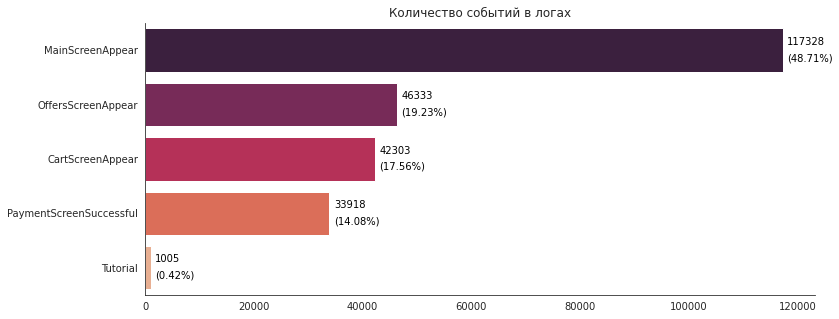

In [189]:
plt.figure(figsize=(12, 5))
plt.title('Количество событий в логах')
sns.barplot(y=events['event'], x=events['count'], palette='rocket', orient='h')

for i, v in enumerate(events['count'].values):
    plt.text(v + 800, i - 0.1, str(v), color='black', fontsize = 10)
    plt.text(v + 800, i + 0.2, '({:.2%})'.format(v / events['count'].sum()), 
             color='black', fontsize = 10)

plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.show()

<a id='4_2'></a>
### Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.
[*Назад к оглавлению*](#Оглавление)

In [190]:
users_per_event = logs.groupby('event').agg(users=('user_id','nunique')).sort_values('users', ascending=False).reset_index()
users_per_event

,event,users
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


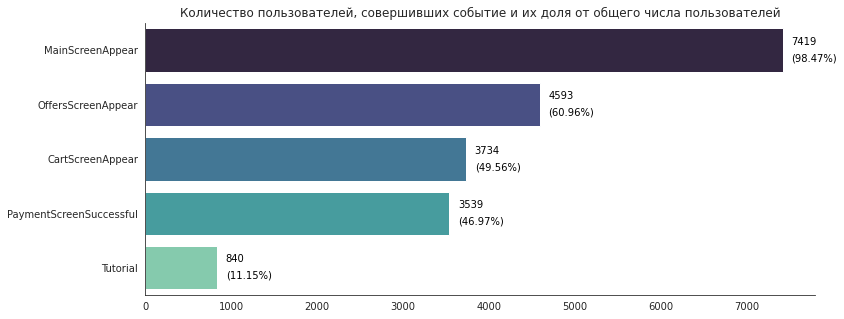

In [191]:
plt.figure(figsize=(12, 5))
plt.title('Количество пользователей, совершивших событие и их доля от общего числа пользователей')
sns.barplot(y=users_per_event['event'], x=users_per_event['users'], palette='mako', orient='h')

for i, v in enumerate(users_per_event['users'].values):
    plt.text(v + 100, i - 0.1, str(v), color='black', fontsize = 10)
    plt.text(v + 100, i + 0.2, '({:.2%})'.format(v / logs['user_id'].nunique()),
             color='black', fontsize = 10)
    
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.show()

<a id='4_3'></a>
### Предположим, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
[*Назад к оглавлению*](#Оглавление)

Логично предположить, что просмотр урока (учебника) в цепочку событий не входит.
Тогда:

In [192]:
users = logs[logs['event'] != 'Tutorial'].pivot_table(
    index='user_id', 
    columns='event', 
    values='date_time',
    aggfunc='min')

step_1 = ~users['MainScreenAppear'].isna()
step_2 = step_1 & (users['OffersScreenAppear'] > users['MainScreenAppear'])
step_3 = step_2 & (users['CartScreenAppear'] > users['OffersScreenAppear'])
step_4 = step_3 & (users['PaymentScreenSuccessful'] > users['CartScreenAppear'])

users

event,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful
user_id,,,,
6888746892508752,NaT,2019-08-06 14:06:34,NaT,NaT
6909561520679493,2019-08-06 18:52:58,2019-08-06 18:52:54,2019-08-06 18:53:04,2019-08-06 18:52:58
6922444491712477,2019-08-04 14:19:40,2019-08-04 14:19:33,2019-08-04 14:19:46,2019-08-04 14:19:40
7435777799948366,NaT,2019-08-05 08:06:34,NaT,NaT
7702139951469979,2019-08-02 14:28:45,2019-08-01 04:29:54,2019-08-01 04:29:56,2019-08-02 14:28:45
...,...,...,...,...
9217594193087726423,2019-08-02 09:00:58,NaT,2019-08-02 09:01:08,2019-08-02 09:00:57
9219463515465815368,2019-08-06 16:49:40,2019-08-05 05:26:26,2019-08-06 16:48:57,2019-08-06 16:52:16
9220879493065341500,2019-08-02 17:59:16,2019-08-02 17:58:48,2019-08-02 17:59:00,NaT


<a id='4_4'></a>
### По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитаем отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B. На каком шаге теряем больше всего пользователей? Какая доля пользователей доходит от первого события до оплаты?
[*Назад к оглавлению*](#Оглавление)

<div class="alert alert-block alert-info">

### Комментарий студента v_1:
Устраняем замечания ниже v_1.  
</div>

In [193]:
logs['event'].value_counts() # посмотрим на распределение логов между событиями

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event, dtype: int64

In [217]:
# Группируем данные по событию, его частоте и количеству уникальных пользователей
event_user = (
        logs.groupby('event').agg({'event':'count', 'user_id': 'nunique'})
        .rename(columns={'event':'event_cnt', 'user_id':'user_cnt'})
        .sort_values(by ='event_cnt', ascending=False).reset_index()
    )
#Создаем таблицу для анализа.

# Доля уникальных пользователей относительно общего количества пользователей
#event_user['rate %'] = round((event_user['user_cnt'] / len(logs['user_id'].unique())) * 100, 1)
#  Cдвиг столбца user_cnt на одну строку вниз
event_user['step'] = event_user['user_cnt'].shift()
# Конверсия в следущий шаг
event_user['convers_step'] = round(event_user['user_cnt'] / event_user['step'] * 100, 1) 
# Удаляем столбец step
event_user.drop(columns= ['step'], axis = 1, inplace = True)
# Заменю NaN в первой строке на 100% к ним будем считать следующий шаг
event_user = event_user.fillna(100)
event_user

,event,event_cnt,user_cnt,convers_step
0,MainScreenAppear,117328,7419,100.0
1,OffersScreenAppear,46333,4593,61.9
2,CartScreenAppear,42303,3734,81.3
3,PaymentScreenSuccessful,33918,3539,94.8
4,Tutorial,1005,840,23.7


In [216]:
# Строим график частоты событий
#fig2 = go.Figure(go.Bar(        x=event_user['event_cnt'],        y=event_user['event'],        orientation='h',        textposition="inside",))

#fig2.update_layout(    title="Частота событий",    font=dict(size=12),    width=100,    height=500,)
# Строим график воронки событий
fig1 = go.Figure(go.Funnel(
   
    x=event_user['user_cnt'],
    y=event_user['event'],
    textposition="inside",))

fig1.update_layout(
    title="Воронка событий",
    font=dict(size=12),
    width=100,
    height=500)

# Объединяем два графика
fig = sp.make_subplots(rows=1, cols=1, subplot_titles=("Воронка событий", ""))
fig.add_trace(fig1.data[0], row=1, col=1)
#fig.add_trace(fig2.data[0], row=1, col=2)

# Общее название графиков
fig.update_layout(
    title_x=0.50,
    title_text="События в приложении", 
    font=dict(size=12))

fig.update_layout(width=1000, height=500)

fig.show()

**Выводы:**
1. 7419 пользователей просмотрели Главный экран, 
из них 4593 просмотрели товар (61.9%), 
из них 3734 перешли в корзину (81.3% от предыдущего шага),
из них 3539 завершили оплату (94.8% от предыдущего шага).
2. Больше всего пользователей теряется после первого шага - только 61.9% переходят на карточку товара.
3. По каждому шагу воронки прошло всего 11% пользователей (840 из 7419, начавших с главного экрана). 

<a id='5_1'></a>
## Изучаем результаты эксперимента ##

### Сколько пользователей в каждой экспериментальной группе? ###
[*Назад к оглавлению*](#Оглавление)

In [196]:
logs.groupby('test_group').agg(count=('user_id', 'nunique'))

,count
test_group,
246,2484
247,2513
248,2537


<a id='5_2'></a>
### Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247. ###
[*Назад к оглавлению*](#Оглавление)

*Удобно обернуть проверку в отдельную функцию.*

<div class="alert alert-block alert-info">

### Комментарий студента v_1:
Устраняем замечания ниже v_1 () "сформулировать нулевую и альтернативную гипотезы". 
</div>

Определим гипотезы:

Гипотеза H0: доли двух выборок уникальных посетителей, побывавших на этапе воронки, равны между собой.
Гипотеза H1: между долями уникальных посетителей, побывавших на этапе воронки, есть значимая разница..


In [197]:
"""
Функция принимает на вход два датафрейма с логами и по заданному событию попарно проверяет 
есть ли статистически значимая разница между долями пользователей, совершивших его в группе 1 и группе 2
Входные параметры:
    df1, df2 - датафреймы с логами
    event - событие
    alpha - критический уровень статистической значимости
"""
def z_test(df1, df2, event, alpha):
    #alpha = alpha
    # число пользователей в группе 1 и группе 2:
    n_users = np.array([df1['user_id'].nunique(), df2['user_id'].nunique()])

    # число пользователей, совершивших событие в группе 1 и группе 2
    success = np.array([df1[df1['event'] == event]['user_id'].nunique(), df2[df2['event'] == event]['user_id'].nunique()])

    # пропорции успехов в группах:
    p1 = success[0]/n_users[0]
    p2 = success[1]/n_users[1] 
    # пропорция успехов в комбинированном датасете:
    p_combined = (success[0] + success[1]) / (n_users[0] + n_users[1])

    # разница пропорций в датасетах
    difference = p1 - p2 

    z_value = difference / np.sqrt(p_combined * (1 - p_combined) * (1/n_users[0] + 1/n_users[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('\n'+'\033[1m' + event + ':' + '\033[0m') #Bold font
    print('p-значение: ', p_value)

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница.")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.")

In [198]:
# Составим список всех возможных событий:
EVENTS_ARRAY = logs['event'].unique()
EVENTS_ARRAY


array(['Tutorial', 'MainScreenAppear', 'OffersScreenAppear',
       'CartScreenAppear', 'PaymentScreenSuccessful'], dtype=object)

<div class="alert alert-block alert-info">

### Комментарий студента v_1:
Устраняем замечания ниже v_1 () "Почему применяешь поправку Бонферрони" 
</div>

В задании сказано: При уровне значимости 0.1 в 10% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна.

Понизил уровень значимости, потому что тестировать будем 4 группы между собой, и у нас идет множественная проверка гипотез, а значит - увеличивается риск ложноположительного результата (найти различия там, где их на самом деле нет).
Зададим критический уровень статистической значимости:
Поскольку в итоге проведем 5*4=20 тестов, то нами была применена поправка Бонферрони к коэффициенту статистической значимости.

In [199]:
ALPHA = 0.1/20
ALPHA

0.005

<a id='5_3'></a>
### Посчитаем число пользователей, совершивших  событие в каждой из контрольных групп. Посчитаем долю пользователей, совершивших это событие. Проверим, будет ли отличие между группами статистически достоверным. Проделаем то же самое для всех других событий. Можно ли сказать, что разбиение на группы работает корректно? ###
[*Назад к оглавлению*](#Оглавление)

In [200]:
# Проверим, есть ли статистически значимая разница между контрольными группами 246 и 247:
for event in EVENTS_ARRAY:
    z_test(logs[logs['test_group'] == 246], logs[logs['test_group'] == 247], event, ALPHA)


Tutorial:
p-значение:  0.9376996189257114
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.

MainScreenAppear:
p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.

OffersScreenAppear:
p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.

CartScreenAppear:
p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.

PaymentScreenSuccessful:
p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.


При заданном уровне значимости у нас нет оснований считать группы **246 и 247** разными.

<a id='5_4'></a>
### Аналогично поступим с группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравним результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать? ###
[*Назад к оглавлению*](#Оглавление)

In [201]:
# Проверим есть ли статистически значимая разница между контрольной 246 и экпериментальной 248 группами:
for event in EVENTS_ARRAY:
    z_test(logs[logs['test_group'] == 246], logs[logs['test_group'] == 248], event, ALPHA)


Tutorial:
p-значение:  0.8264294010087645
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.

MainScreenAppear:
p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.

OffersScreenAppear:
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.

CartScreenAppear:
p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.

PaymentScreenSuccessful:
p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.


При заданном уровне значимости у нас нет оснований считать группы **246 и 248** разными.

In [202]:
# Проверим есть ли статистически значимая разница между контрольной 247 и экпериментальной 248 группами:
for event in EVENTS_ARRAY:
    z_test(logs[logs['test_group'] == 247], logs[logs['test_group'] == 248], event, ALPHA)


Tutorial:
p-значение:  0.765323922474501
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.

MainScreenAppear:
p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.

OffersScreenAppear:
p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.

CartScreenAppear:
p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.

PaymentScreenSuccessful:
p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.


При заданном уровне значимости у нас нет оснований считать группы **247 и 248** разными.

In [203]:
# Проверим есть ли статистически значимая разница между объединённой контрольной и экпериментальной 248 группами:
for event in EVENTS_ARRAY:
    z_test(pd.concat([logs[logs['test_group'] == 246], logs[logs['test_group'] == 247]]), logs[logs['test_group'] == 248], 
           event, ALPHA)


Tutorial:
p-значение:  0.764862472531507
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.

MainScreenAppear:
p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.

OffersScreenAppear:
p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.

CartScreenAppear:
p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.

PaymentScreenSuccessful:
p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.


При заданном уровне значимости у нас нет оснований считать группы **(246+247) и 248** разными.

<a id='5_5'></a>
### Какой уровень значимости выбрали при проверке статистических гипотез выше? Посчитаем, сколько проверок статистических гипотез мы сделали. При уровне значимости 0.1 в 10% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна. Какой уровень значимости стоит применить? Если мы хотим изменить его, проделаем предыдущие пункты и проверим свои выводы. ###
[*Назад к оглавлению*](#Оглавление)

**Вывод:**
Изменение шрифтов во всём приложении на поведение пользователей не повлияло.

<a id='6'></a>
**Общие выводы:**  
[*Назад к оглавлению*](#Оглавление)  
В нашем распоряжении оказалось 240887 логов, 7534 пользователя и 5 возможных событий.

*Анализ поведения пользователей*

Среднее количество событий на пользователя: 20.

Распределение логов по событиям выглядит следующим образом:

MainScreenAppear (Главный экран) увидели 117328 раз
OffersScreenAppear (Продающий экран) увидели 46333 раз
CartScreenAppear (Корзина продаж) увидели 42303 раз
PaymentScreenSuccessful (Завершение оплаты) увидели 33918 раз
Tutorial (Урок) просмотрели 1005 раз

*Воронка событий (без учёта последовательности):*

Просмотр Урока (и, возможно, другие шаги) не является обязательным условием совершения покупки.

*Воронка событий с учётом последовательности событий:*  
1. 7419 пользователей просмотрели Главный экран, 
из них 4593 просмотрели товар (61.9%), 
из них 3734 перешли в корзину (81.3% от предыдущего шага),
из них 3539 завершили оплату (94.8% от предыдущего шага).
2. Больше всего пользователей теряется после первого шага - только 61.9% переходят на карточку товара.
3. По каждому шагу воронки прошло всего 11% пользователей (840 из 7419, начавших с главного экрана). Видимо, Урок не сделан привлекательным для пользователей, они его пропускают ("скипают") для экономии времени. Если это приводит к большим обращениям в техподдержку (что за пределами нашего исследования), то Урок нужно переделать.

*Проверка результатов А/А/В-эксперимента*

Размеры тестовых групп несколько отличаются:

246(А) : 79302  
247(А) : 77022  
248(В) : 84563  

Количество уникальных пользователей по группам:

246(А) : 2484  
247(А) : 2513  
248(В) : 2537  
В будущем стоит поработать над принципом выделения групп, чтобы их размер был абсолютно одинаковым.

Множество А/В-тестов, проведённых по каждому из событий, не обнаружило статистически значимой разницы между группами. Т.е. **изменение шрифтов во всём приложении на поведение пользователей не повлияло.**